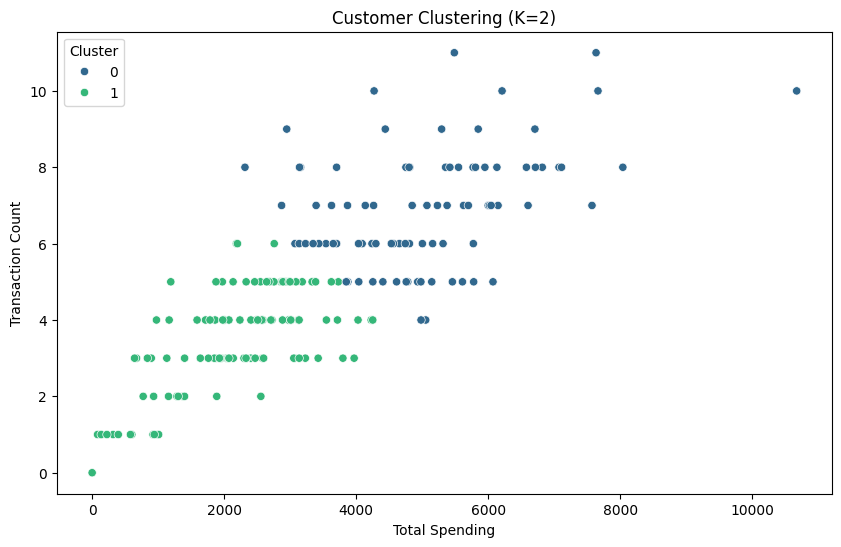

<ipython-input-9-abb1e599cb0d>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data["Cluster"], y=data["TransactionCount"], palette="viridis")


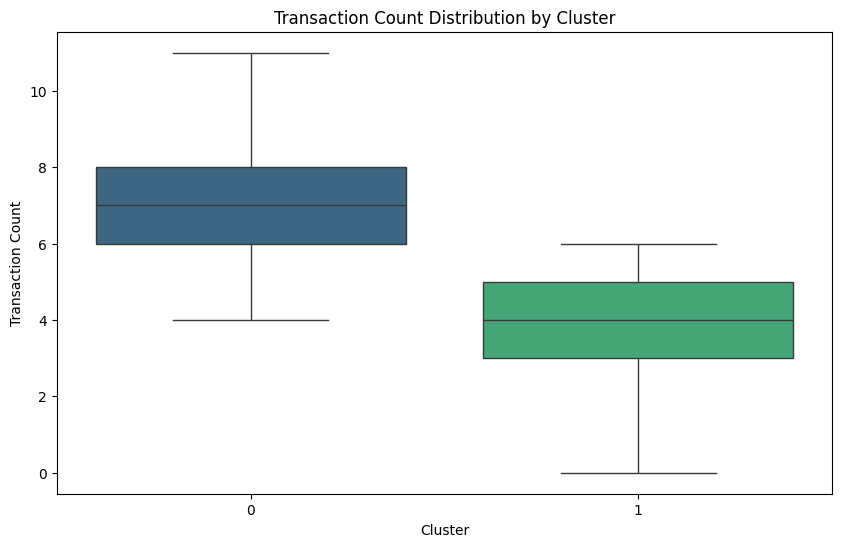

Optimal Clusters: 2, DB Index: 0.7340


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score




def load_data(customers_path, transactions_path):
    customers = pd.read_csv(customers_path)
    transactions = pd.read_csv(transactions_path)
    return customers, transactions

def preprocess_data(customers, transactions):
    transaction_summary = transactions.groupby("CustomerID").agg(
        TotalSpending=("TotalValue", "sum"),
        TransactionCount=("TransactionID", "count")
    ).reset_index()

    data = customers.merge(transaction_summary, on="CustomerID", how="left").fillna(0)
    features = data[["TotalSpending", "TransactionCount"]]
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    return data, scaled_features

def find_optimal_clusters(scaled_features):
    db_scores = {}
    for k in range(2, 11):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(scaled_features)
        db_scores[k] = davies_bouldin_score(scaled_features, labels)
    return min(db_scores, key=db_scores.get), db_scores

def perform_clustering(scaled_features, data, optimal_k):
    kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    data["Cluster"] = kmeans.fit_predict(scaled_features)
    return data, kmeans

def visualize_clusters(data, optimal_k):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data["TotalSpending"], y=data["TransactionCount"], hue=data["Cluster"], palette="viridis")
    plt.title(f"Customer Clustering (K={optimal_k})")
    plt.xlabel("Total Spending")
    plt.ylabel("Transaction Count")
    plt.legend(title="Cluster")
    plt.show()


    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data["Cluster"], y=data["TransactionCount"], palette="viridis")
    plt.title("Transaction Count Distribution by Cluster")
    plt.xlabel("Cluster")
    plt.ylabel("Transaction Count")
    plt.show()

def main():
    customers, transactions = load_data("/content/drive/MyDrive/E COMMERCE DATA ANALYSIS/Customers.csv", "/content/drive/MyDrive/E COMMERCE DATA ANALYSIS/Transactions.csv")
    data, scaled_features = preprocess_data(customers, transactions)
    optimal_k, db_scores = find_optimal_clusters(scaled_features)
    data, kmeans = perform_clustering(scaled_features, data, optimal_k)
    visualize_clusters(data, optimal_k)
    print(f"Optimal Clusters: {optimal_k}, DB Index: {db_scores[optimal_k]:.4f}")

if __name__ == "__main__":
    main()